# Data distribution 

The quantitative data is in the cleaned tables of matches (match_clean_player_4), player attributes (player_att_clean) and team attributes (team_att_clean). Let us load them and take an exploratory look at the ditributions to get a better grasp of what we are working with.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
%matplotlib inline

In [2]:
#Imports
match_clean_player_4 = pd.read_csv('match_clean_player_4.csv')
player_att_clean = pd.read_csv("player_att_clean.csv")
team_att_clean = pd.read_csv("team_att_clean.csv")

### Matches

The match_clean_player_4 table contains every match played in any of the 11 European leagues considered during seasons from 2008/09 to 2015/16 (more than 10 000). For every match, we have information on the teams that played, the result and the players (there are thus, except for incomplete samples, 22 entries for a given match, containing the 11 players of each of the two teams that played).

In [3]:
match_clean_player_4.head()

,country_id,country,league,season,stage,date,match_year,match_api_id,team_flag,team_api_id,team_long_name,team_short_name,team_goals,result,points,player_api_id,player_name,birthday,height,weight
0,4769,France,Ligue 1,2008/2009,1,2008-08-09,2008,483129,home_team,8583,AJ Auxerre,AUX,2,won,3,30823,Stephane Grichting,1979-03-30,185.42,176
1,4769,France,Ligue 1,2008/2009,1,2008-08-09,2008,483129,home_team,8583,AJ Auxerre,AUX,2,won,3,30977,Dariusz Dudka,1983-12-09,182.88,185
2,4769,France,Ligue 1,2008/2009,1,2008-08-09,2008,483129,home_team,8583,AJ Auxerre,AUX,2,won,3,34037,Ireneusz Jelen,1981-04-09,182.88,163
3,4769,France,Ligue 1,2008/2009,1,2008-08-09,2008,483129,home_team,8583,AJ Auxerre,AUX,2,won,3,40714,Remy Riou,1987-08-06,187.96,179
4,4769,France,Ligue 1,2008/2009,1,2008-08-09,2008,483129,home_team,8583,AJ Auxerre,AUX,2,won,3,11323,Cedric Hengbart,1980-07-13,182.88,161


In [5]:
print (np.unique(match_clean_player_4["season"]),"\n", np.unique(match_clean_player_4["league"]))
print ("Number of matches:", len(np.unique(match_clean_player_4["match_api_id"])))

['2008/2009' '2009/2010' '2010/2011' '2011/2012' '2012/2013' '2013/2014'
 '2014/2015' '2015/2016'] 
 ['1. Bundesliga' 'Ekstraklasa' 'Eredivisie' 'Jupiler League' 'LIGA BBVA'
 'Liga ZON Sagres' 'Ligue 1' 'Premier League' 'Scottish Premiership'
 'Serie A' 'Super League']
Number of matches: 25221


In [27]:
# check that we have indeed 22 instances of a given match, on average
players_per_match = 0; count = 0
for i in range(0, match_clean_player_4.shape[0]):
    count += 1
    players_per_match += match_clean_player_4[match_clean_player_4["match_api_id"]==
                     match_clean_player_4["match_api_id"][i]].shape[0]
players_per_match/count

21.669122962307295

The first thing we can look at are the numerical columns. Those that may be of interest are: team_goals, points, height and weight. We can use pandas method for creating a histogram out of a column: since we have approximately the same number of instances for every match, this will suffice for an exploratory check of the overall distribution. Let us thus not pay much attention to the values on the vertical axis and concentrate on the shape of the distribution instead.

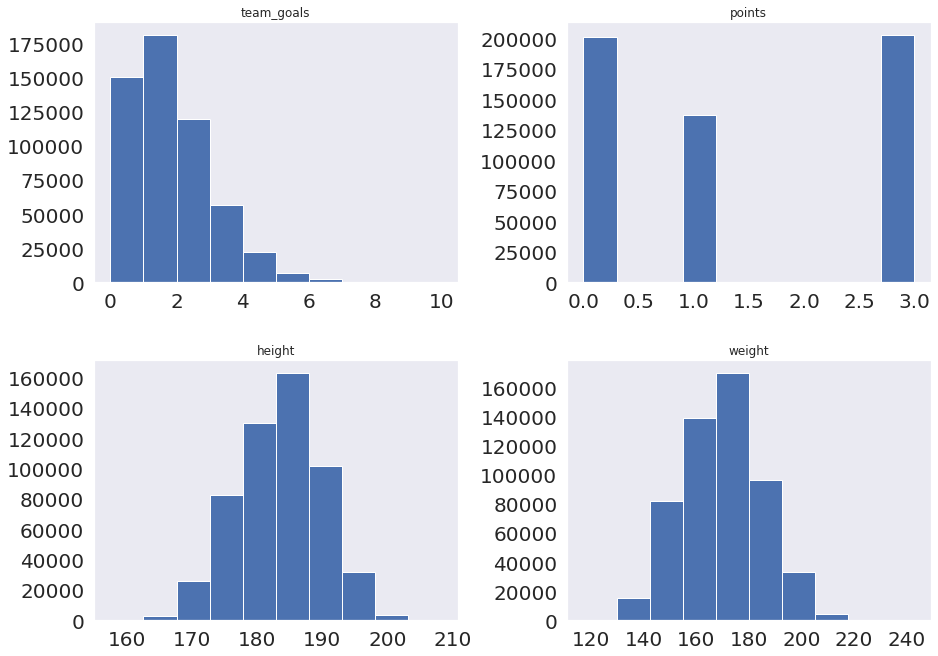

In [94]:
match_numcols = ["team_goals","points","height", "weight"]
fontsize=20
df.hist(column=match_numcols, figsize=(15,11), xlabelsize=fontsize, ylabelsize=fontsize, 
        grid=False)
                 
plt.show()

From the above, we see that a team most probably scores between 0 and 3 goals per match, that points per match are either 0, 1 or 3 (corresponding to losing, ending in draw and winning; draws being less frequent and wins and losses having the same number) and that height (in cm) and weight (in pounds) are more or less normally distributed. All of this makes perfect sense.

If now we turn to non-numerical variables, we might wonder which country, league or season holds more matches. Let us check (we use a seaborn method now, because the one we used above does not work with non-numerical columns):

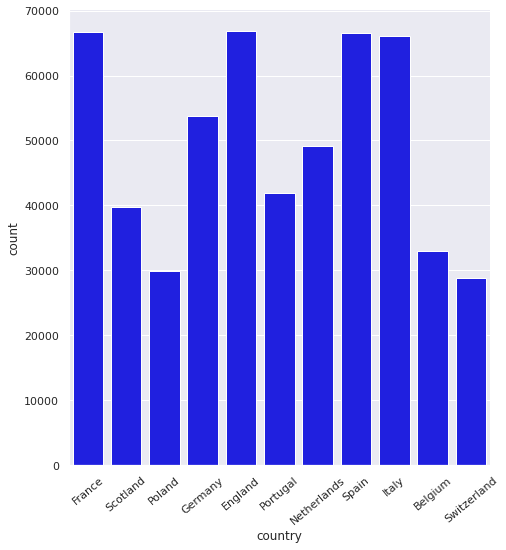

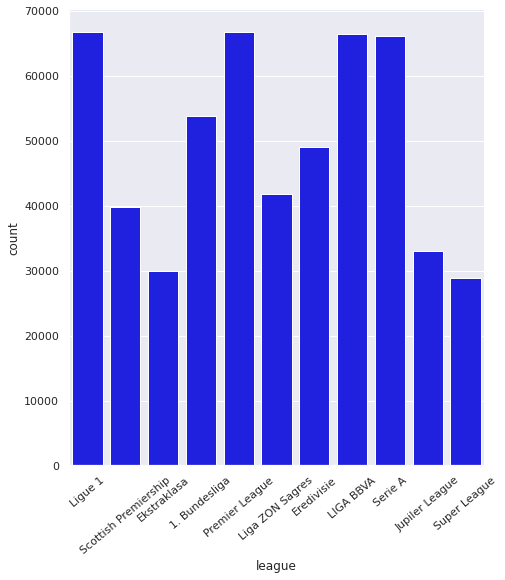

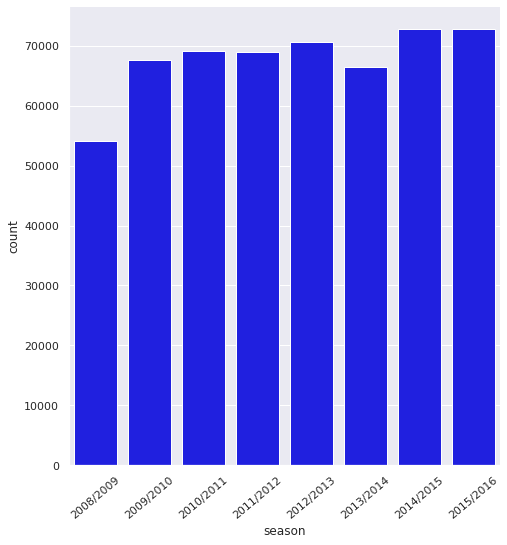

In [74]:
import seaborn as sns

# non-numerical vars
cat_cols = ["country", "league", "season"]

for i,col in enumerate(cat_cols):
    # looks like the only way of controlling figsize in catplot is through height parameter.
    hist = sns.catplot(x=col, kind="count", color="blue", data=match_clean_player_4, height=7)
    #  rotate ticks to avoid overlap
    hist.set_xticklabels(rotation=40)
    plt.show()

From the above, we know that the countries (or leagues, since both categories correspond each other in the data: hence their equal distribution) that held more matches from 2008/09 to 2015/16 are Spain, France, England and Italy. As for the number of matches per season, it looks that there was a gradual increase from the first to the last season,

We can also do some checks, like verifying the number of matches at home and away are equal (for every match, there is one team playing away and another playing home): 

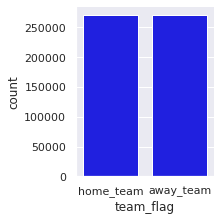

In [83]:
# looks like the only way of controlling figsize in catplot is through height parameter.
col = "team_flag"
hist = sns.catplot(x=col, kind="count", color="blue",data=match_clean_player_4, height=3)
plt.show()

Finally, we can also look at the matches played by each team, which will vary depending on the league and the active period of the team. This is just to see that the distribution is indeed irregular, since the total teams are just too many (299) for us to see the labels of the histogram.

In [80]:
# number of teams
len(np.unique(match_clean_player_4["team_api_id"]))

299

In [79]:
# looks like the only way of controlling figsize in catplot is through height parameter.
col = "team_api_id"
hist = sns.catplot(x=col, kind="count", color="blue",data=match_clean_player_4, height=100)
hist.set_xticklabels(rotation=90)
plt.show()

### Player Attributes

The player_att_clean table contains the performance attributes (such as preferred foot, overall rating or marking) of more than 10 000 players. The data are taken from the EA Sports' FIFA video game series, and for every player there are 1 or more entries (measured/estimated at different times).


In [108]:
print(player_att_clean.shape)
print("Number of players:",len(np.unique(player_att_clean["player_api_id"])))
player_att_clean.head()

(180354, 42)
Number of players: 10410


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18,67,71,right,medium,medium,49,...,54,48,65,69,69,6,11,10,8,8
1,2,218353,505942,2015-11-19,67,71,right,medium,medium,49,...,54,48,65,69,69,6,11,10,8,8
2,3,218353,505942,2015-09-21,62,66,right,medium,medium,49,...,54,48,65,66,69,6,11,10,8,8
3,4,218353,505942,2015-03-20,61,65,right,medium,medium,48,...,53,47,62,63,66,5,10,9,7,7
4,5,218353,505942,2007-02-22,61,65,right,medium,medium,48,...,53,47,62,63,66,5,10,9,7,7


Let us now look at the rough distribution of the data on the players. Note that this is an approximation, because there are duplicate players and some have more entries than others, but again this is just an exploratory phase. 

The numerical data have the following distributions:

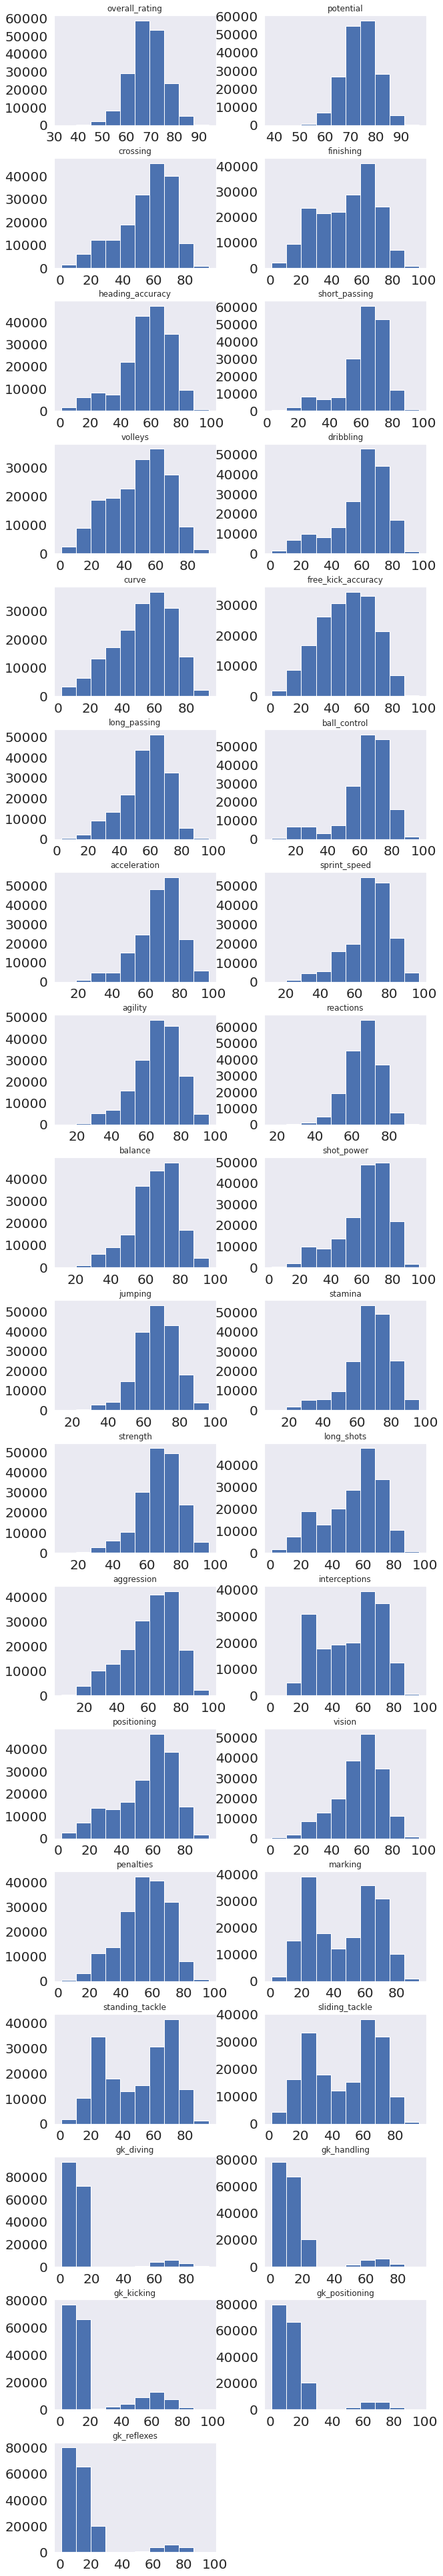

In [104]:
patt_cols = player_att_clean.columns
#numerical variables
player_att_clean.hist(column=patt_cols[4:6].append(patt_cols[9:]),figsize=(10, 70), grid=None, 
                     layout=(18,2), xlabelsize=fontsize, ylabelsize=fontsize
                     )
plt.show()

We may note the presence of some bimodal distributions: this is probably due to the fact that football positions are specialised, leading to some of the attributes having more than one peak (for instance, attackers are not expected to be as good as defenders at long shots).

Let us now check the non numerical features.

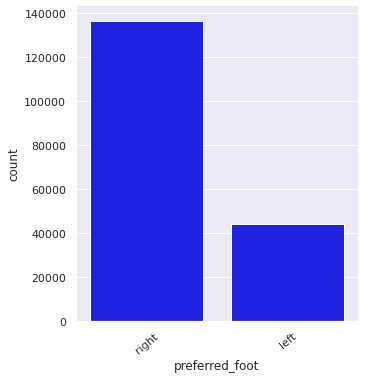

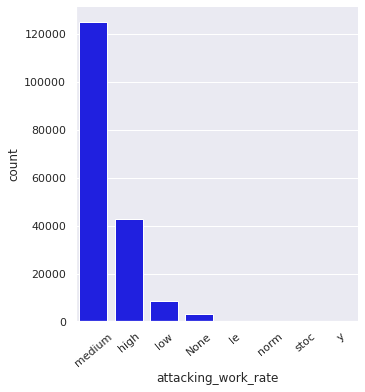

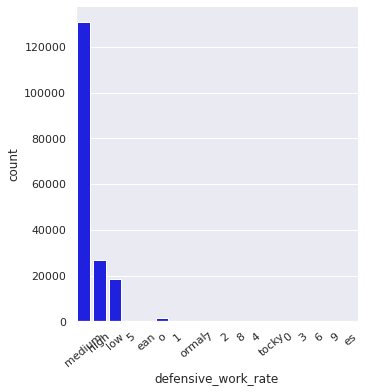

In [110]:
import seaborn as sns

# categorical vars
patt_catcols = ["preferred_foot", "attacking_work_rate","defensive_work_rate"]

for i,col in enumerate(patt_catcols):
    hist = sns.catplot(x=col, kind="count", color="blue", data=player_att_clean)
    hist.set_xticklabels(rotation=40)
    
#plt.show()

Makes sense: medium attacking and defensive work rates are the most frequent, and left-footed players are about one third of the right-footed ones (approximately 25% of the total). 

However, the defensive work rate has mixed values of ordinal and categorical nature (see following cell), so we would probably gain little from that column.

In [113]:
np.unique(player_att_clean["defensive_work_rate"])

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'ean', 'es',
       'high', 'low', 'medium', 'o', 'ormal', 'tocky'], dtype=object)

### Team Attributes

The team_att_clean table contains the performance attributes (such as build up play speed pr defence team width ) of nearly 300 teams. The data are also taken from the EA Sports' FIFA video game series, and also here there are 1 or more entries for every team (measured/estimated at different times).

In [117]:
print(team_att_clean.shape)
print("Number of teams:",len(np.unique(team_att_clean["team_api_id"])))
pd.set_option('display.max_columns', 100)
team_att_clean.head()

(1458, 24)
Number of teams: 288


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2016-02-18,60,Balanced,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2015-11-19,52,Balanced,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-21,47,Balanced,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2015-03-20,70,Fast,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2007-02-22,47,Balanced,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


Let us look at the distribution of the potentially relevant columns of team_att_clean:

In [118]:
num_cols = ['buildUpPlaySpeed','buildUpPlayPassing', 'chanceCreationPassing',
            'chanceCreationCrossing','chanceCreationShooting','defencePressure', 
            'defenceAggression', 'defenceTeamWidth']
cat_cols = ['buildUpPlaySpeedClass', 'buildUpPlayDribblingClass',
        'buildUpPlayPassingClass',
       'buildUpPlayPositioningClass','chanceCreationPassingClass',
            'chanceCreationCrossingClass' , 'chanceCreationShootingClass',
            'chanceCreationPositioningClass','defencePressureClass', 
       'defenceAggressionClass', 'defenceTeamWidthClass',
       'defenceDefenderLineClass']

Starting with the numerical columns:

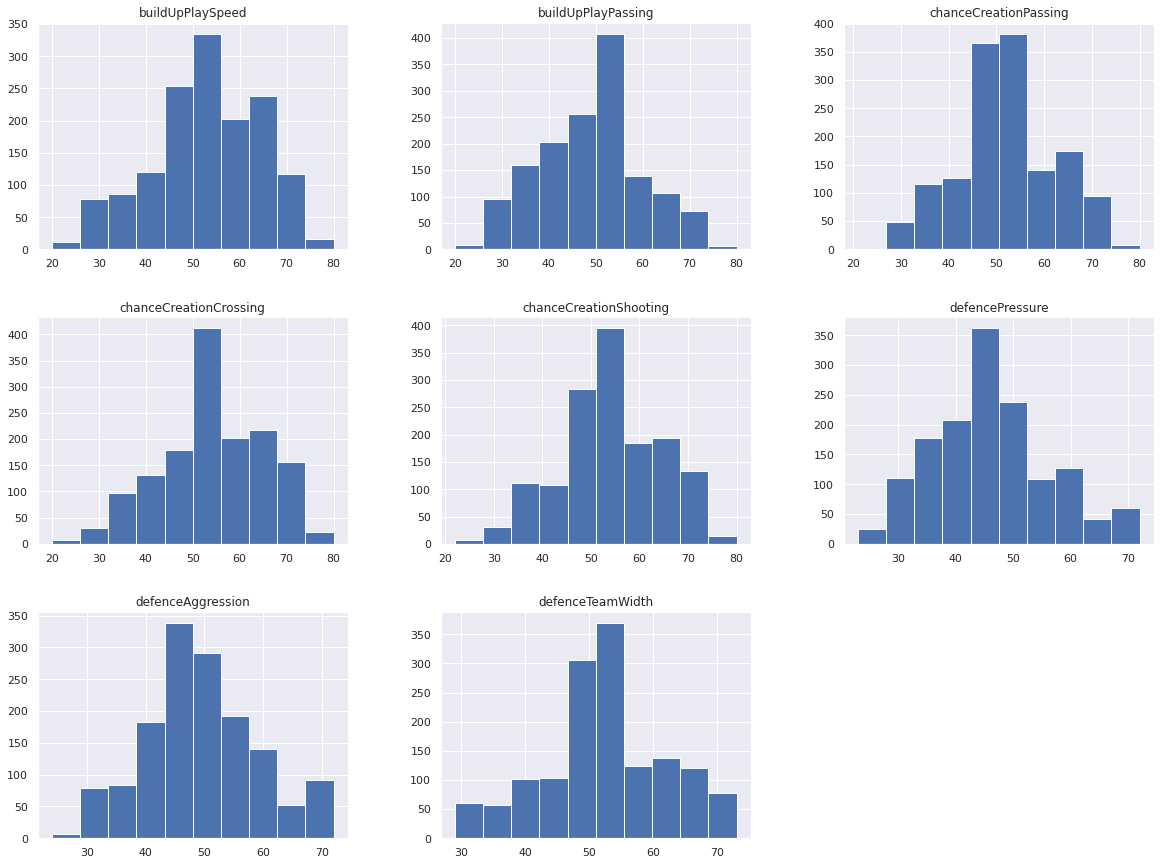

In [119]:
# numerical vars
team_att_clean.hist(column=num_cols, figsize=(20,15))
        
plt.show()

Alright, nothing out of the ordinary nor particularly interesting: we have unimodal distributions that look more or less symmetric.

Let us now check the non-numerical variables, which are mostly a classification of the numerical values: 

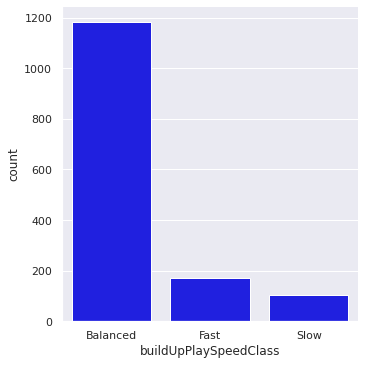

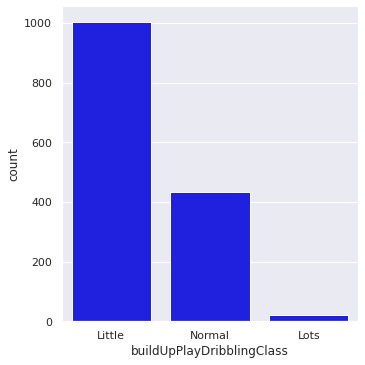

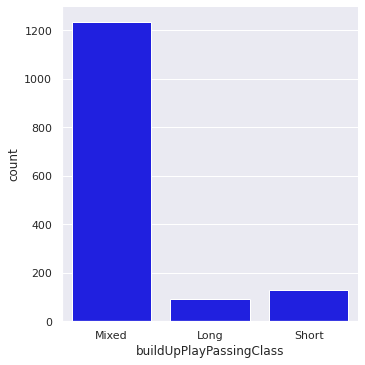

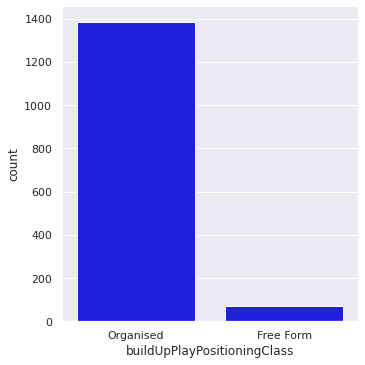

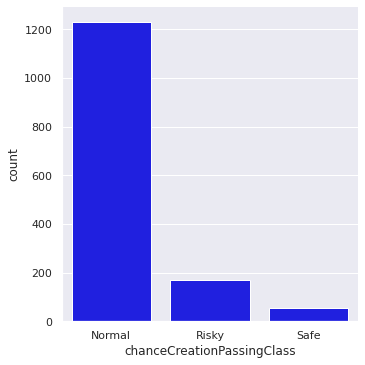

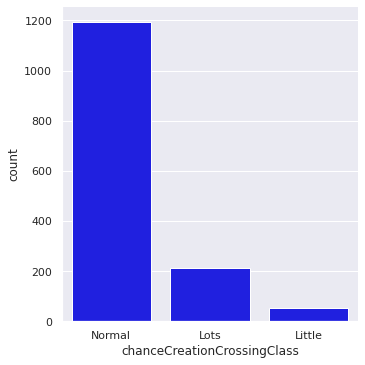

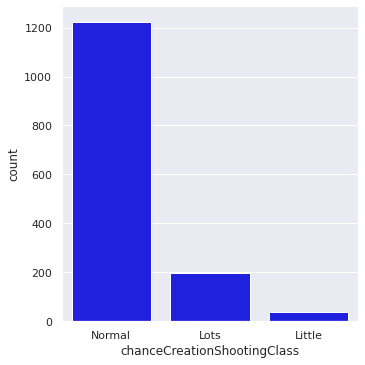

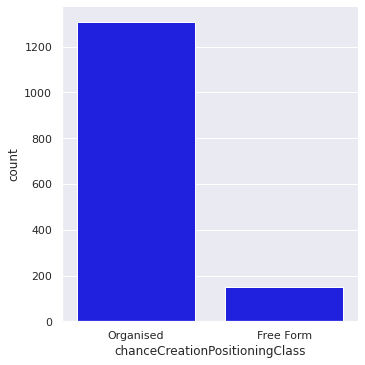

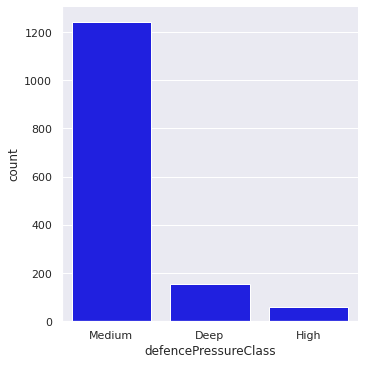

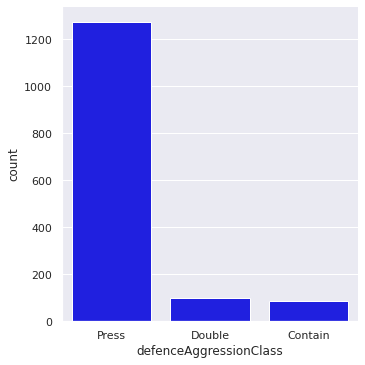

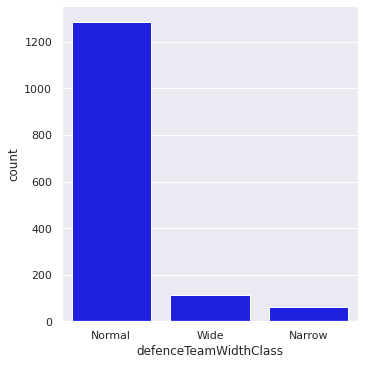

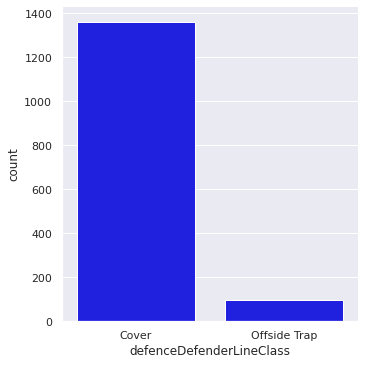

In [121]:
# non-numerical vars

import seaborn as sns

for i,col in enumerate(cat_cols):
     sns.catplot(x=col, kind="count", color="blue", data=team_att_clean)


Aside from "normal", "balanced", "mixed" or "medium" values being usually the most frequent (the opposite would mean bad news, like skewed data or bad cleaning on our part), we see above that most teams show little build up play dribbling. We note as well some useful information about team strategy: most teams opt for organised (as opposed to free form) build up play and chance creation positionings and for a pressing (instead of double or contained) aggression and a cover (as opposed to offside trap) method for the defender line when defending.

### To sum up

This concludes the first review of the data distribution. We have three tables of temporal data about matches, players and teams (both in numeric and non-numeric form). The information is rich and, although incomplete (there are some missing samples, for instance regarding players), not at all sparse. Finally, the cleaned data are well formatted (with the sole exception of the defensive work rate in the player attributes table), so we will be able to make meaningful visualisations thereof!